# References
## Hamm et al. 1987a, b
* Distribution and measurement of single-axon recurrent inhibitory post-synaptic potentials. Results here are used mostly for comparisons in a qualitatively manner.
* Simulations tryed to reproduce Figure 5 (first paper) and Figure 2 (second paper).
* The authors could obtain a proportion of motoneuron-motor axon that could be used to define the connectivity in the pool.

## Uchiyama et al. (2003a)
* Number of Renshaw cells associated with the medial gastrocnemius $\alpha$ motoneuron pool is arbitrarily assumed to be 300, but it is not too far away from what has been studied in the literature.

# Parameters adjusted
* Supposedly, the probability of connections and motoneuron conductances on Renshaw cells are the only parameters to be adjusted.

# Considerations
* Stimulation of motor axons would require modifications on the code and would be a time consuming task. In order to simulate the experiments presented, stimulation were delivered to the soma of the motoneuron and this was considered to have the same effect as a single motor axon stimulation.
* Proportions cited in the work of Hamm and colleages is not explored in the simulations yet because of the lack of informations regarding distances.
* SOL is used here because of an error. It should be MG on the pool creation and the appropriate value for the pool boundary (according to McCurdy and Hamm (1994a)).
* For now, I am using a Renshaw cell density of 300 cells per 7 mm. I could change this density later to something similar to what was described in Cisi and Kohn (2008). The value of 7 mm used here is the length of the medial gastrocnemius neuronal column in the cat (it was 10 mm in Cisi work).

In [1]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.interpolate import UnivariateSpline

from Configuration import Configuration
from MotorUnitPoolOpt import MotorUnitPool
from InterneuronPoolOpt import InterneuronPool
from NeuralTract import NeuralTract

In [16]:
def simulator(numberS, numberFR, numberFF, numberRC, MNi, Parametrization, MNRCdecay, RCMNdecay, posMN, posRC):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = 50
    
    if Parametrization == 'old':
        from SynapsesFactory import SynapsesFactory
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
        
    elif Parametrization == 'new':
        from SynapsesFactory import SynapsesFactory
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
        
    elif Parametrization == 'final':
        from SynapsesFactoryRenshaw import SynapsesFactory
        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.130
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.119
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.081
        
        # Threshold
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 18.9089
        conf.confArray['f2'][idx] = 18.9089

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 27
        conf.confArray['f2'][idx] = 27
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 218.2168
        conf.confArray['f2'][idx] = 218.2168
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 7000
        conf.confArray['f2'][idx] = 7000

        # Ks
        idx = np.where(conf.confArray['f0']=='gmax_Kf:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 3300
        idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 2300000
        idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.02
        idx = np.where(conf.confArray['f0']=='alpha_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.004
        idx = np.where(conf.confArray['f0']=='alpha_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='beta_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.5
        
        ## Connectivity, set to ensure neurons are connected properly
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        
        # Decay factors
        idx = np.where(conf.confArray['f0']=='dec:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        
        # Columnar length
        idx = np.where(conf.confArray['f0']=='position:MG-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posMN
        idx = np.where(conf.confArray['f0']=='position:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posRC
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'MG')
    pools[1] = InterneuronPool(conf, 'RC', 'ext')
    
#     import pdb; pdb.set_trace()
    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    MN_mV = np.zeros((pools[0].MUnumber, len(t)))
    RC_mV = np.zeros((pools[1].Nnumber, len(t)))
    for i in xrange(0, len(t)):
        # stimulus to soma of MNi
        if t[i]>10 and t[i]<11:
            pools[0].iInjected[2*MNi+1] = 40
        else:
            pools[0].iInjected[2*MNi+1] = 0
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        pools[2].atualizePool(t[i]) # RC synaptic Noise
        pools[1].atualizeInterneuronPool(t[i]) # RC pool
        for j in xrange(pools[0].MUnumber):
            MN_mV[j, i] = pools[0].v_mV[2*j+1]
        for j in xrange(pools[1].Nnumber):
            RC_mV[j, i] = pools[1].v_mV[j]

    pools[0].listSpikes()
    pools[1].listSpikes()
    
    positions = []
    for i in range(pools[0].MUnumber):
        positions.append(pools[0].unit[i].position_mm)
    
    return MN_mV, RC_mV, t, positions

In [17]:
nS = 75
nFR = 75
nFF = 150
nRC = 300
nMN = nS+nFR+nFF
MNi = (nMN)/2
params = 'final'

MNRCdecay = 1/6.0
RCMNdecay = 3.5/3
MNposition = 7
RCposition = 7

MNsignal, RCsignal, t, positions = simulator(nS, nFR, nFF, nRC, MNi, params, MNRCdecay, RCMNdecay, MNposition, RCposition)

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 37673 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built


<IPython.core.display.Javascript object>


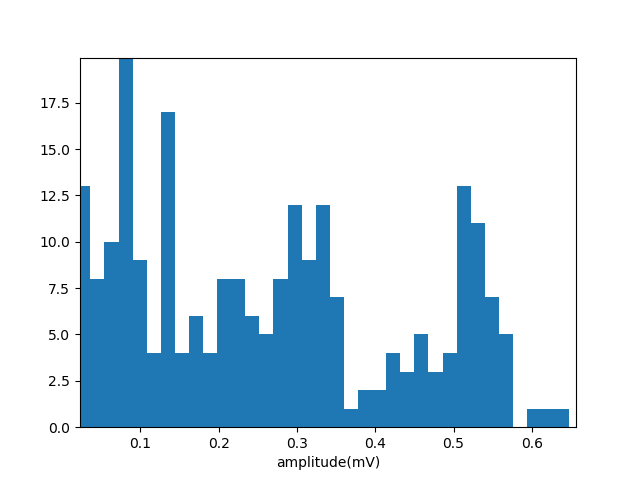

In [18]:
peaks = [abs(min(MNsignal[y,])) for y in range(MNsignal.shape[0]) if y != MNi]
bins = np.linspace(min(peaks),max(peaks),len(peaks)/8)
plt.figure()
plt.hist(peaks, bins=bins)
plt.xlabel('amplitude(mV)')
plt.show()

<IPython.core.display.Javascript object>


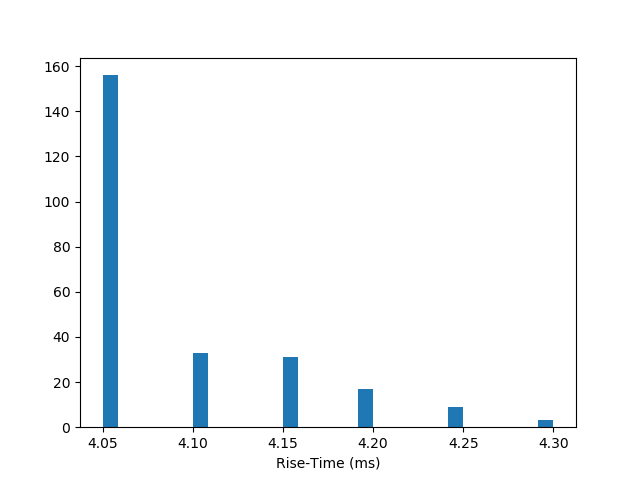

In [19]:
peaks = [min(MNsignal[y,]) for y in range(MNsignal.shape[0])]
rise_time = []

for i in range(MNsignal.shape[0]):
    if i==MNi:
        continue
    for j in range(MNsignal.shape[1]):
        if MNsignal[i,j]!=0.0:
            ti = j
            tf = np.where(MNsignal[i,]==peaks[i])[0][0]
            rise_time.append(t[tf]-t[ti])
            break
            
bins = np.linspace(min(rise_time),max(rise_time),len(rise_time)/8)
plt.figure()
plt.hist(rise_time, bins=bins)
plt.xlabel('Rise-Time (ms)')
plt.show()

<IPython.core.display.Javascript object>


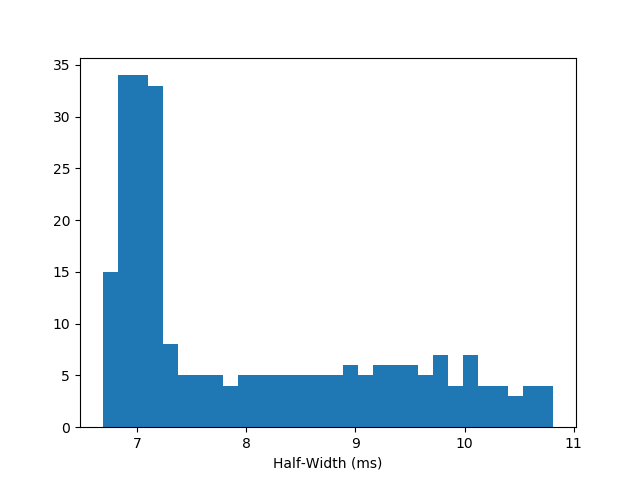

In [20]:
half_width = []

for i in range(MNsignal.shape[0]):
    if i == MNi:
        continue
    if min(MNsignal[i,]) == 0:
        continue
    spline = UnivariateSpline(t, MNsignal[i,] - min(MNsignal[i,])/2, s=0)
    roots = spline.roots()
    if len(roots)>2:
        continue
    r1, r2 = roots
    half_width.append(r2-r1)
    
bins = np.linspace(min(half_width),max(half_width),len(half_width)/8)
plt.figure()
plt.hist(half_width, bins=bins)
plt.xlabel('Half-Width (ms)')
plt.show()

0.21070234113712338


<IPython.core.display.Javascript object>


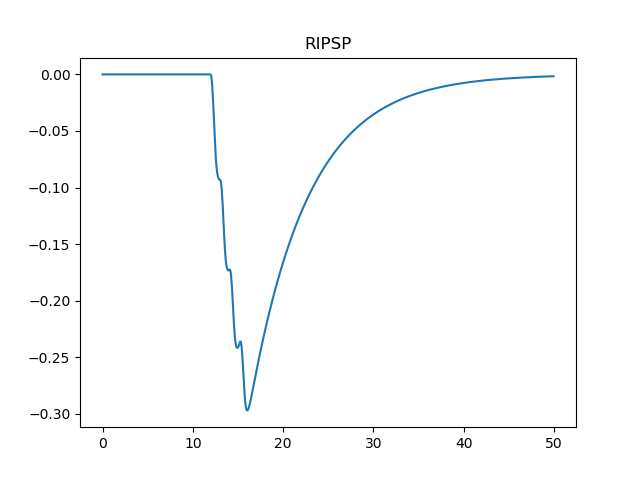

0.23411371237458178


<IPython.core.display.Javascript object>


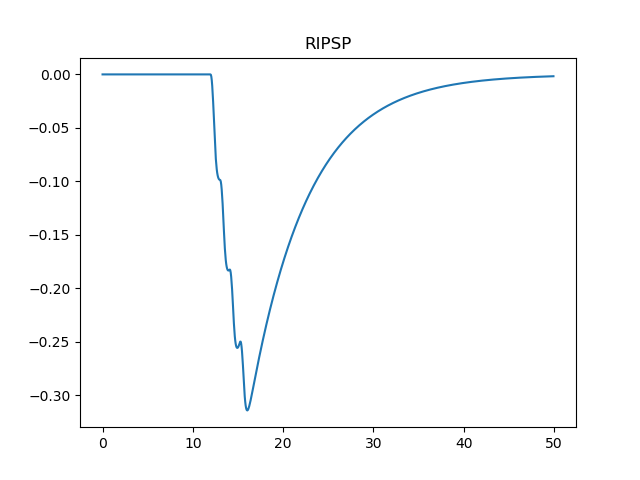

0.2575250836120402


<IPython.core.display.Javascript object>


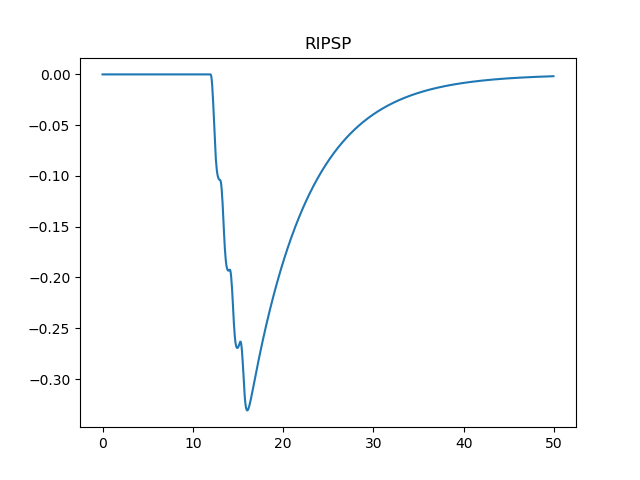

0.28093645484949814


<IPython.core.display.Javascript object>


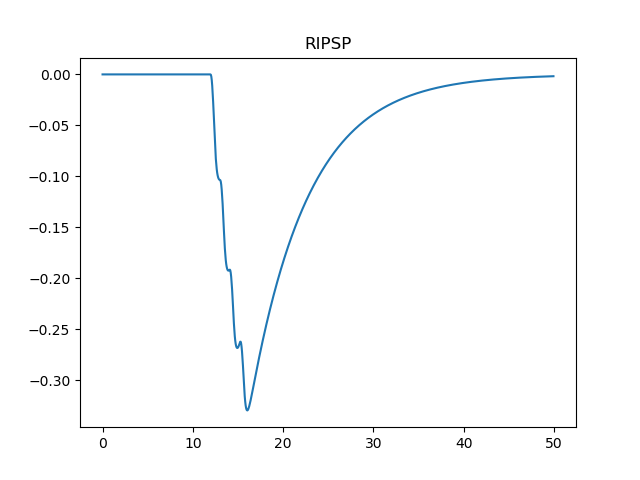

0.959866220735786


<IPython.core.display.Javascript object>


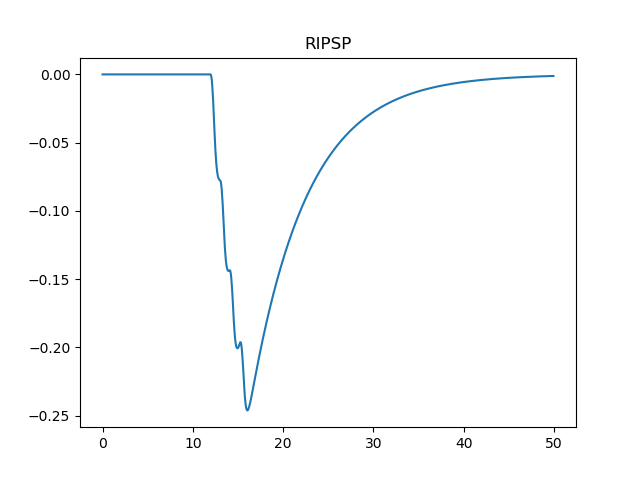

0.9832775919732439


<IPython.core.display.Javascript object>


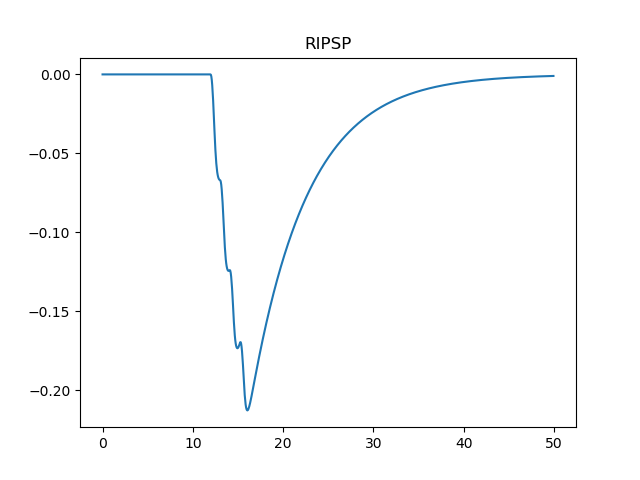

1.006688963210702


<IPython.core.display.Javascript object>


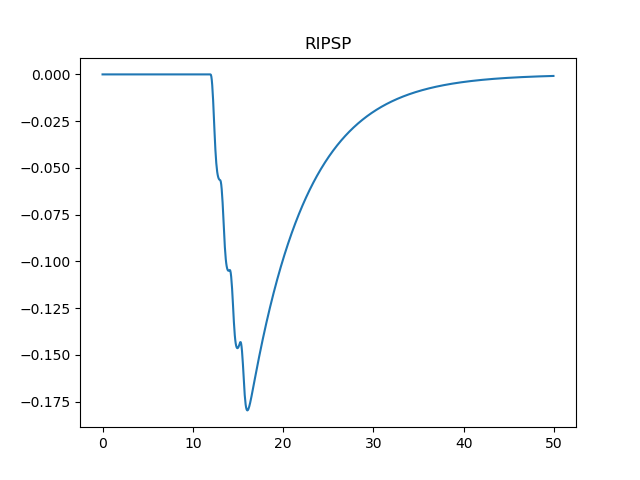

1.0301003344481607


<IPython.core.display.Javascript object>


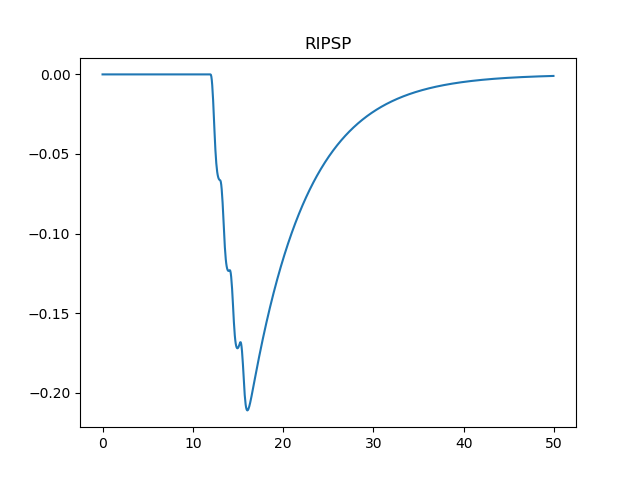

1.568561872909699


<IPython.core.display.Javascript object>


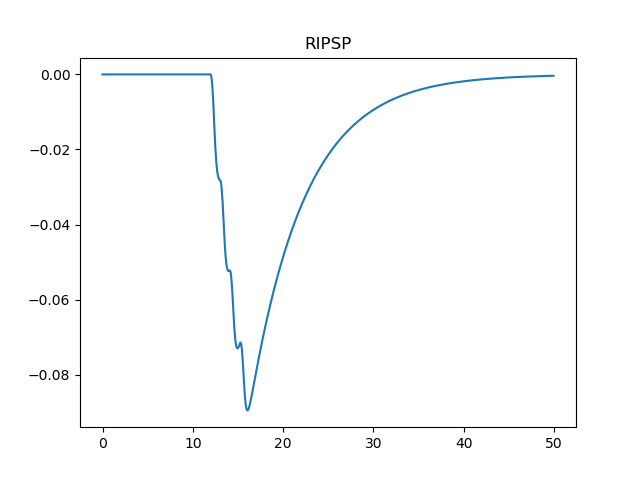

1.591973244147157


<IPython.core.display.Javascript object>


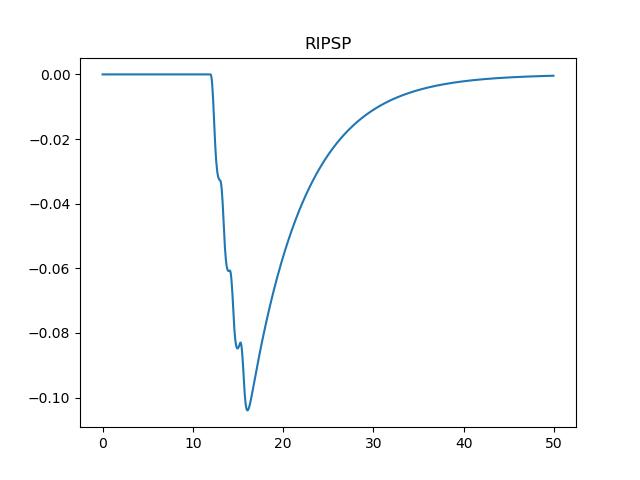

1.615384615384615


<IPython.core.display.Javascript object>


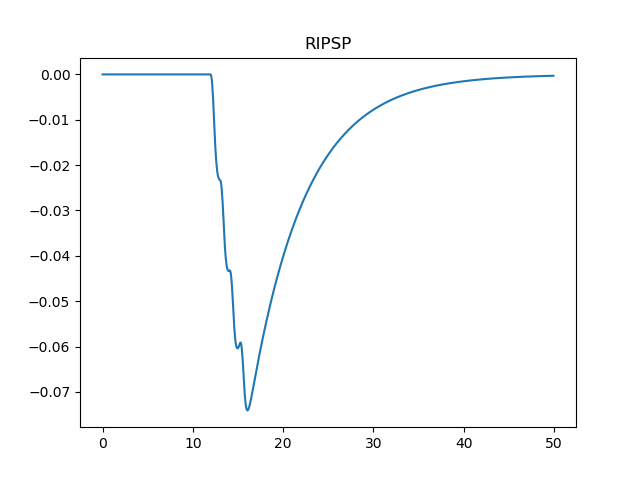

1.638795986622073


<IPython.core.display.Javascript object>


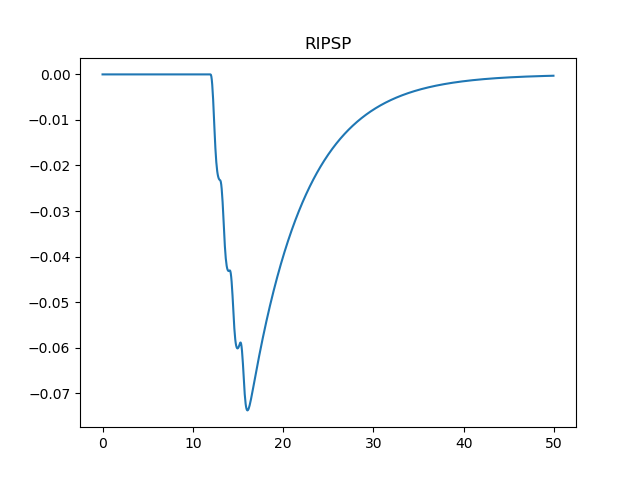

In [21]:
for i in xrange(nMN-MNi):
    if np.isclose(positions[MNi+i] - positions[MNi], 0.25, atol=5e-2) or np.isclose(positions[MNi+i] - positions[MNi], 1, atol=5e-2) or np.isclose(positions[MNi+i] - positions[MNi], 1.6, atol=5e-2):
        print positions[MNi+i] - positions[MNi]
        plt.figure()
        plt.plot(t, MNsignal[MNi+i,])
        plt.title('RIPSP')
        plt.show()